<a href="https://colab.research.google.com/github/RSNROXX/Analysis-of-Indian-and-US-Stocks-Using-ML-Models/blob/main/DecisionTree_Nasdaq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.feature_selection import RFECV, SelectFromModel, SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

import yfinance as yf
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

stock_data = yf.download('^IXIC', start='2015-01-01', end='2018-12-01')
stock_data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,4760.240234,4777.009766,4698.109863,4726.810059,4726.810059,1435150000
2015-01-05,4700.339844,4702.770020,4641.459961,4652.569824,4652.569824,1794470000
2015-01-06,4666.850098,4667.330078,4567.589844,4592.740234,4592.740234,2167320000
2015-01-07,4626.839844,4652.720215,4613.899902,4650.470215,4650.470215,1957950000
2015-01-08,4689.540039,4741.379883,4688.020020,4736.189941,4736.189941,2105450000


In [ ]:
df = yf.download('^IXIC', start='2015-01-01', end='2018-12-31')
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,4760.240234,4777.009766,4698.109863,4726.810059,4726.810059,1435150000
2015-01-05,4700.339844,4702.770020,4641.459961,4652.569824,4652.569824,1794470000
2015-01-06,4666.850098,4667.330078,4567.589844,4592.740234,4592.740234,2167320000
2015-01-07,4626.839844,4652.720215,4613.899902,4650.470215,4650.470215,1957950000
2015-01-08,4689.540039,4741.379883,4688.020020,4736.189941,4736.189941,2105450000
...,...,...,...,...,...,...
2018-12-21,6573.490234,6586.680176,6304.629883,6332.990234,6332.990234,4571670000
2018-12-24,6278.490234,6355.180176,6190.169922,6192.919922,6192.919922,1647440000
2018-12-26,6257.859863,6555.529785,6214.339844,6554.359863,6554.359863,2572890000


In [ ]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-21,6573.490234,6586.680176,6304.629883,6332.990234,6332.990234,4571670000
2018-12-24,6278.490234,6355.180176,6190.169922,6192.919922,6192.919922,1647440000
2018-12-26,6257.859863,6555.529785,6214.339844,6554.359863,6554.359863,2572890000
2018-12-27,6457.189941,6583.009766,6336.970215,6579.490234,6579.490234,2449110000
2018-12-28,6616.790039,6684.180176,6529.220215,6584.520020,6584.520020,2216250000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1005 entries, 2015-01-02 to 2018-12-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1005 non-null   float64
 1   High       1005 non-null   float64
 2   Low        1005 non-null   float64
 3   Close      1005 non-null   float64
 4   Adj Close  1005 non-null   float64
 5   Volume     1005 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 55.0 KB


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1.005000e+03
mean,5896.213440,5926.607004,5861.608138,5896.063157,5896.063157,1.990865e+09
std,1073.544401,1079.075105,1065.677235,1071.627328,1071.627328,3.903914e+08
min,4218.810059,4293.220215,4209.759766,4266.839844,4266.839844,7.068800e+08
25%,4981.240234,5001.569824,4956.229980,4982.830078,4982.830078,1.754690e+09
50%,5472.009766,5486.750000,5441.759766,5471.430176,5471.430176,1.930000e+09
75%,6886.459961,6917.009766,6844.879883,6875.799805,6875.799805,2.141220e+09
max,8094.200195,8133.299805,8079.310059,8109.689941,8109.689941,4.571670e+09


In [ ]:
df.shape

(1005, 6)

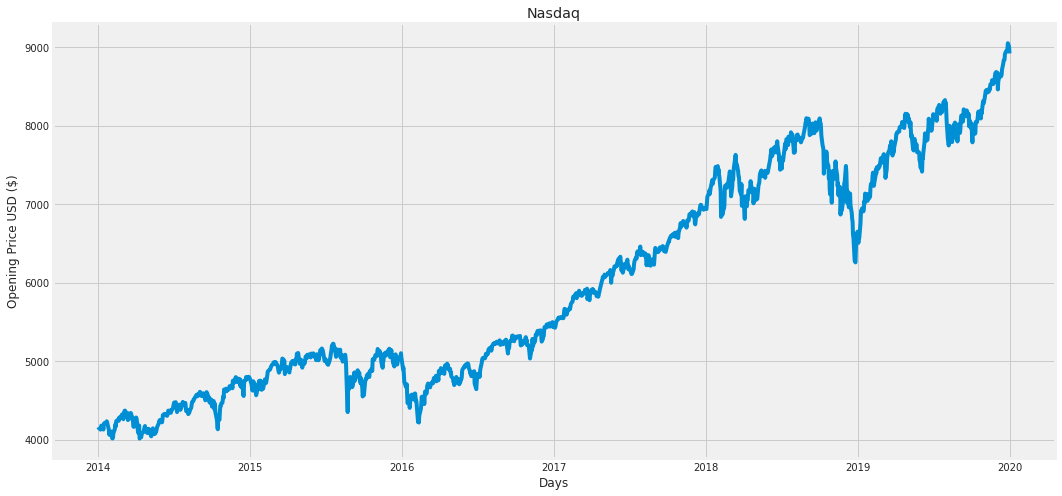

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Nasdaq')
plt.xlabel('Days')
plt.ylabel('Opening Price USD ($)')
plt.plot(df['Open'])
plt.show()

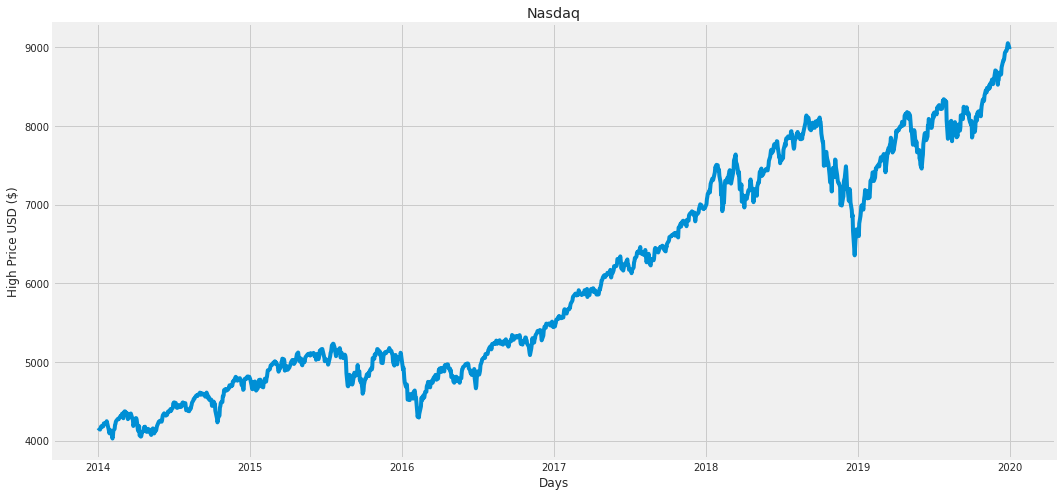

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Nasdaq')
plt.xlabel('Days')
plt.ylabel('High Price USD ($)')
plt.plot(df['High'])
plt.show()

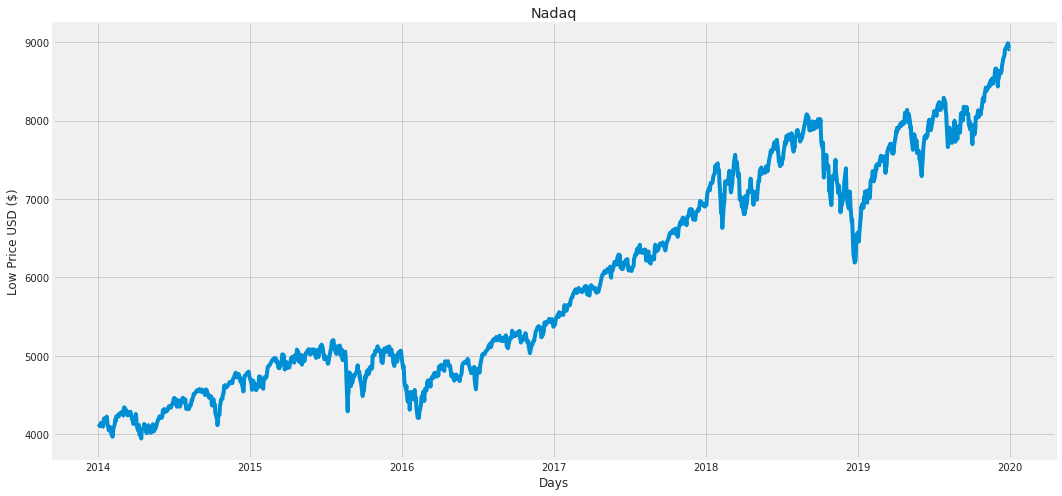

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Nadaq')
plt.xlabel('Days')
plt.ylabel('Low Price USD ($)')
plt.plot(df['Low'])
plt.show()

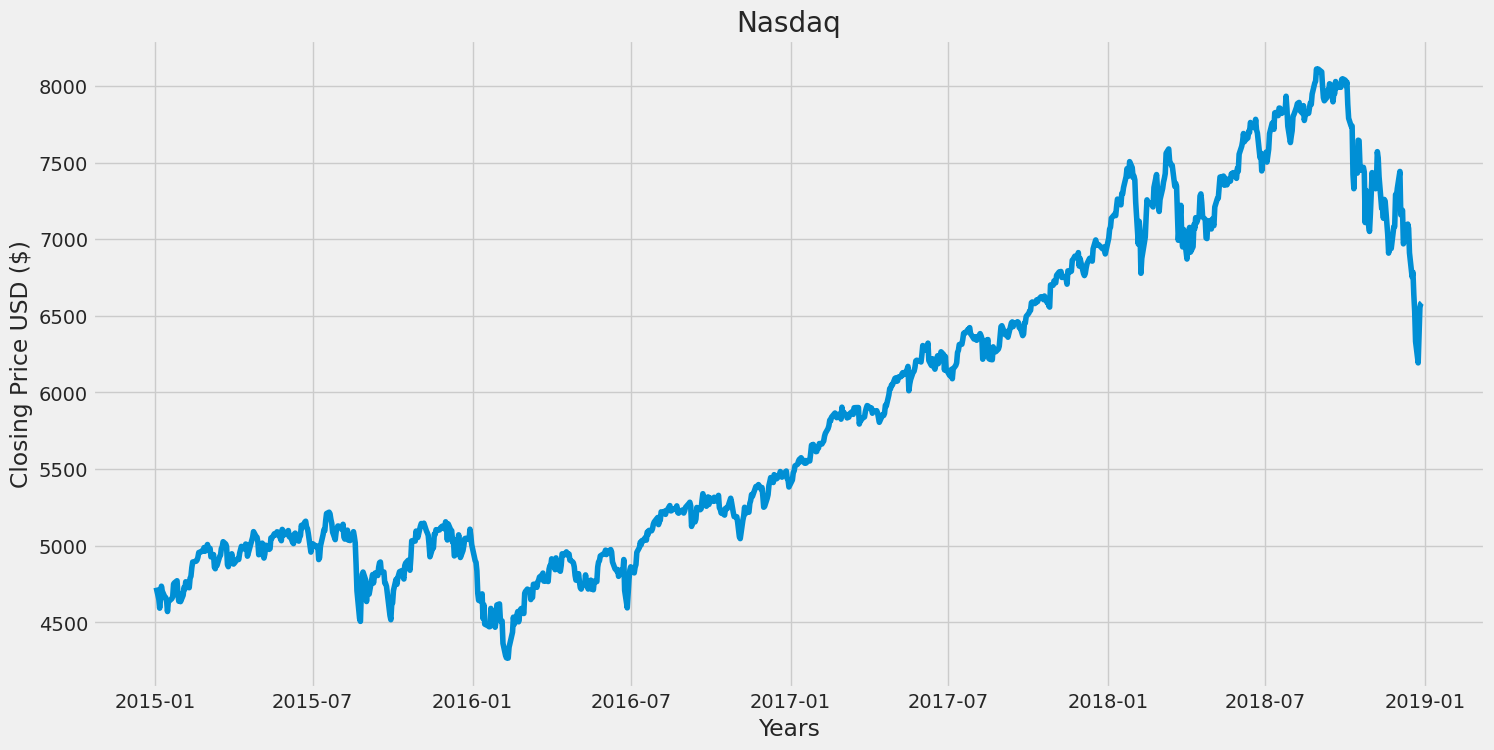

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Nasdaq')
plt.xlabel('Years')
plt.ylabel('Closing Price USD ($)')
plt.plot(df['Close'])
plt.show()

In [ ]:
df2 = df['Close']

In [ ]:
df2.tail()

Date
2019-12-24 00:00:00-05:00    8952.879883
2019-12-26 00:00:00-05:00    9022.389648
2019-12-27 00:00:00-05:00    9006.620117
2019-12-30 00:00:00-05:00    8945.990234
2019-12-31 00:00:00-05:00    8972.599609
Name: Close, dtype: float64

In [ ]:
df2 = pd.DataFrame(df2)

In [ ]:
df2.tail()

,Close
Date,
2019-12-24 00:00:00-05:00,8952.879883
2019-12-26 00:00:00-05:00,9022.389648
2019-12-27 00:00:00-05:00,9006.620117
2019-12-30 00:00:00-05:00,8945.990234
2019-12-31 00:00:00-05:00,8972.599609


In [ ]:
future_days = 65
df2['Prediction'] = df2['Close'].shift(-future_days)

In [ ]:
df2.tail()

,Close,Prediction
Date,,
2019-12-24 00:00:00-05:00,8952.879883,NaN
2019-12-26 00:00:00-05:00,9022.389648,NaN
2019-12-27 00:00:00-05:00,9006.620117,NaN
2019-12-30 00:00:00-05:00,8945.990234,NaN
2019-12-31 00:00:00-05:00,8972.599609,NaN


In [ ]:
X = np.array(df2.drop(['Prediction'], 1))[:-future_days]
print(X)

[[4143.06982422]
 [4131.91015625]
 [4113.68017578]
 ...
 [8077.37988281]
 [8030.66015625]
 [7939.62988281]]


<ipython-input-19-5c69b61eae2a>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(df2.drop(['Prediction'], 1))[:-future_days]


In [ ]:
y = np.array(df2['Prediction'])[:-future_days]
print(y)

[4079.75       4112.99023438 4183.89990234 ... 9006.62011719 8945.99023438
 8972.59960938]


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
print(x_train)

[[7845.02001953]
 [4183.02001953]
 [8123.29003906]
 ...
 [7161.64990234]
 [4768.85986328]
 [5241.35009766]]


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [ ]:
tree = DecisionTreeRegressor().fit(x_train, y_train)
lr = LinearRegression().fit(x_train, y_train)

In [ ]:
x_future = df2.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

<ipython-input-25-4ab4510f9901>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x_future = df2.drop(['Prediction'], 1)[:-future_days]


array([[7967.75976562],
       [8006.24023438],
       [8091.16015625],
       [8109.08984375],
       [8170.22998047],
       [8161.79003906],
       [8098.37988281],
       [8141.72998047],
       [8202.53027344],
       [8196.04003906],
       [8244.13964844],
       [8258.19042969],
       [8222.79980469],
       [8185.20996094],
       [8207.24023438],
       [8146.49023438],
       [8204.13964844],
       [8251.40039062],
       [8321.5       ],
       [8238.54003906],
       [8330.20996094],
       [8293.33007812],
       [8273.61035156],
       [8175.41992188],
       [8111.12011719],
       [8004.06982422],
       [7726.04003906],
       [7833.27001953],
       [7862.83007812],
       [8039.16015625],
       [7959.14013672],
       [7863.41015625],
       [8016.35986328],
       [7773.93994141],
       [7766.62011719],
       [7895.99023438],
       [8002.81005859],
       [7948.56005859],
       [8020.20996094],
       [7991.39013672],
       [7751.77001953],
       [7853.740

In [ ]:
tree_prediction = tree.predict(x_future)
print(tree_prediction)

[7999.33984375 7908.68017578 7785.25       7872.25976562 7982.47021484
 8175.41992188 8111.12011719 7903.74023438 7950.77978516 8734.87988281
 8048.64990234 8148.70996094 8124.18017578 8156.85009766 8089.54003906
 8162.99023438 8104.29980469 8119.79003906 8185.79980469 8243.12011719
 8185.79980469 8276.84960938 8303.98046875 8292.36035156 8386.40039062
 8077.37988281 8434.6796875  8410.62988281 8434.51953125 8475.30957031
 8464.28027344 8434.51953125 8482.09960938 7259.02978516 8540.83007812
 8098.37988281 8146.49023438 8526.73046875 7291.58984375 8519.87988281
 8632.49023438 8647.9296875  8705.1796875  8665.46972656 8567.99023438
 8520.63964844 7136.39013672 8570.70019531 8656.53027344 8621.83007812
 8616.1796875  8654.04980469 8717.3203125  8734.87988281 8814.23046875
 8162.99023438 8827.74023438 8814.23046875 8924.95996094 8945.65039062
 8952.87988281 9022.38964844 9006.62011719 8945.99023438 8972.59960938]


In [ ]:
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[8140.09413569 8178.29441783 8262.59601498 8280.39515162 8341.09011061
 8332.71162268 8269.76317278 8312.79762675 8373.15521648 8366.71223924
 8414.46162247 8428.41009621 8393.27715984 8355.96101782 8377.83088293
 8317.52321997 8374.75287319 8421.66949724 8491.25869256 8408.90278535
 8499.90523394 8463.29388344 8443.7177415  8346.24226266 8282.41064209
 8176.13981101 7900.13443528 8006.58364551 8035.92846939 8210.97464093
 8131.53726862 8036.50432381 8188.34036301 7947.68556559 7940.41903897
 8068.84717765 8174.88921808 8121.03422688 8192.16242707 8163.55244772
 7925.67706886 8026.90481123 8000.30983762 8030.02159904 8145.68351055
 8135.24978462 8047.17605017 8149.14784686 8288.07902727 8274.41896547
 8258.90288802 8255.64698386 8340.5443092  8365.15336061 8347.5229086
 8324.52169314 8356.76517816 8348.19813184 8353.64790562 8288.9127559
 8283.74073008 8165.77588562 8248.91607941 8202.53653171 8112.1690741 ]


In [ ]:
predictions = tree_prediction
valid = df2[X.shape[0]:]
valid['Predictions'] = predictions

<ipython-input-28-3343a07a945e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


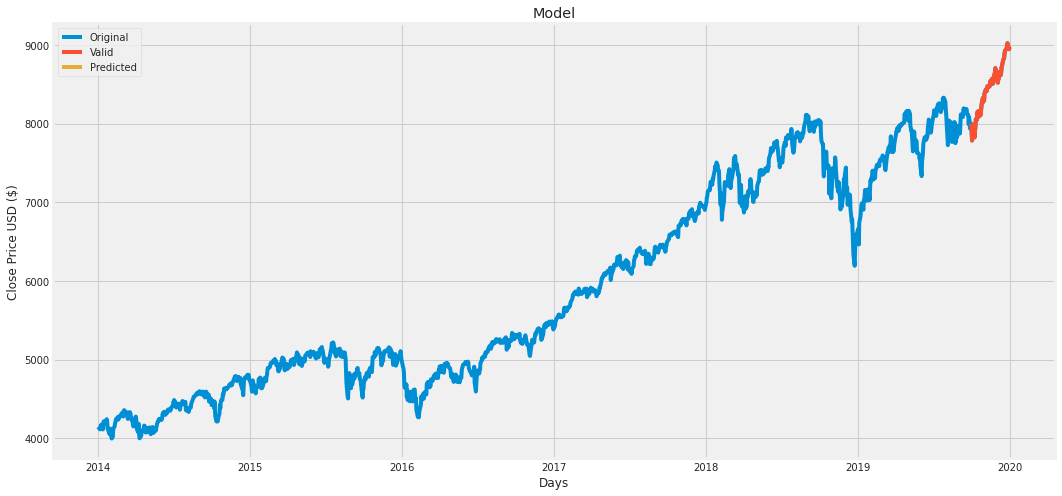

In [ ]:
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df2['Close'])
plt.plot(valid[['Close', 'Prediction']])
plt.legend(["Original", "Valid", 'Predicted'])
plt.show()

In [ ]:
print("Test R-squared: ",round(metrics.r2_score(x_future,tree_prediction),2))
# print("Test Explained Variation: ",round(metrics.explained_variance_score(Y_test,Y_test_pred),2))
# print('Test MAPE:', round(get_mape(Y_test,Y_test_pred), 2))
# print('Test Mean Squared Error:', round(metrics.mean_squared_error(Y_test,Y_test_pred), 2))
# print("Test RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_test,Y_test_pred)),2))
# print("Test MAE: ",round(metrics.mean_absolute_error(Y_test,Y_test_pred),2))

Test R-squared:  -11.41
